In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
# Baca data dari file Excel
excel_file_path = '../orders.xlsx'  # Ganti dengan path file Excel Anda
data = pd.read_excel(excel_file_path, parse_dates=['Pada Tanggal'])


In [3]:
data.head()

,No,Pada Tanggal,Nama,Menu,Quantity,Total Amount
0,1,2024-02-19 03:38:04,afy,"Regal, Rum",2,50
1,2,2024-02-20 03:14:04,afy,"Regal, Rum",3,70
2,3,2024-02-20 08:53:19,afy,"Regal, Rum, Regal",3,70
3,4,2024-02-20 12:07:57,blek,Regal,1,20
4,5,2024-02-20 12:08:47,blek,"Rum, Regal",2,50


In [4]:
data.tail()

,No,Pada Tanggal,Nama,Menu,Quantity,Total Amount
11,12,2024-02-21 15:42:14,afy,"Kopi Susu, Regal, Rum",3,70
12,13,2024-02-22 12:06:40,afy,Kopi Susu,1,20
13,14,2024-02-22 12:09:44,blek,Kopi Susu,1,20
14,15,2024-02-22 12:27:11,blek,Regal,1,20
15,16,2024-02-22 12:29:21,afy,"Rum, Regal",6,130


In [5]:
# Praproses data
data.set_index('Pada Tanggal', inplace=True)
ts = data['Total Amount']

In [6]:
data.head()

,No,Nama,Menu,Quantity,Total Amount
Pada Tanggal,,,,,
2024-02-19 03:38:04,1,afy,"Regal, Rum",2,50
2024-02-20 03:14:04,2,afy,"Regal, Rum",3,70
2024-02-20 08:53:19,3,afy,"Regal, Rum, Regal",3,70
2024-02-20 12:07:57,4,blek,Regal,1,20
2024-02-20 12:08:47,5,blek,"Rum, Regal",2,50


In [7]:
data.describe()

,No,Quantity,Total Amount
count,16.000000,16.000000,16.000000
mean,8.500000,1.937500,43.125000
std,4.760952,1.340087,30.706948
min,1.000000,1.000000,20.000000
25%,4.750000,1.000000,20.000000
50%,8.500000,1.500000,30.000000
75%,12.250000,2.250000,55.000000
max,16.000000,6.000000,130.000000


<Axes: xlabel='Pada Tanggal'>

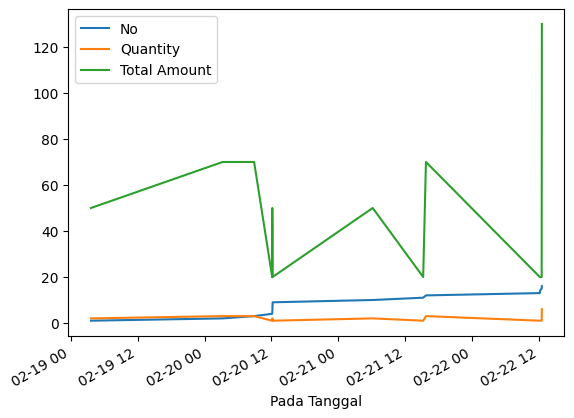

In [8]:
data.plot()

In [9]:
# Pilih parameter SARIMA yang sesuai
order = (1, 1, 1)  # Sesuaikan parameter ini sesuai karakteristik data Anda
seasonal_order = (1, 1, 1, 12)  # Sesuaikan parameter ini sesuai karakteristik data Anda


In [10]:
# Latih model SARIMA
model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)
result = model.fit()

/Users/user/.local/share/virtualenvs/python-nlEX9Ns4/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/user/.local/share/virtualenvs/python-nlEX9Ns4/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/user/.local/share/virtualenvs/python-nlEX9Ns4/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/.local/share/virtualenvs/python-nlEX9Ns4/lib/python3.11/site-packages/

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13521D+00    |proj g|=  2.09864D-03

At iterate    5    f=  1.11577D+00    |proj g|=  3.39358D-04

At iterate   10    f=  1.11477D+00    |proj g|=  2.55802D-03

At iterate   15    f=  1.11467D+00    |proj g|=  2.17038D-04

At iterate   20    f=  1.11463D+00    |proj g|=  4.25331D-04

At iterate   25    f=  1.11461D+00    |proj g|=  1.24860D-03

At iterate   30    f=  1.11456D+00    |proj g|=  3.73870D-04

At iterate   35    f=  1.11452D+00    |proj g|=  2.48758D-03

At iterate   40    f=  1.11449D+00    |proj g|=  9.55555D-04

At iterate   45    f=  1.11448D+00    |proj g|=  4.70617D-04

At iterate   50    f=  1.11447D+00    |proj g|=  3.86920D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/user/.local/share/virtualenvs/python-nlEX9Ns4/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
# Lakukan prediksi satu bulan ke depan
forecast_steps = 15  # Sesuaikan dengan jumlah langkah prediksi yang sesuai dengan satu bulan
forecast_index = pd.date_range(ts.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast = result.get_forecast(steps=forecast_steps, index=forecast_index)
forecast_values = forecast.predicted_mean

In [12]:
pd.plotting.register_matplotlib_converters()


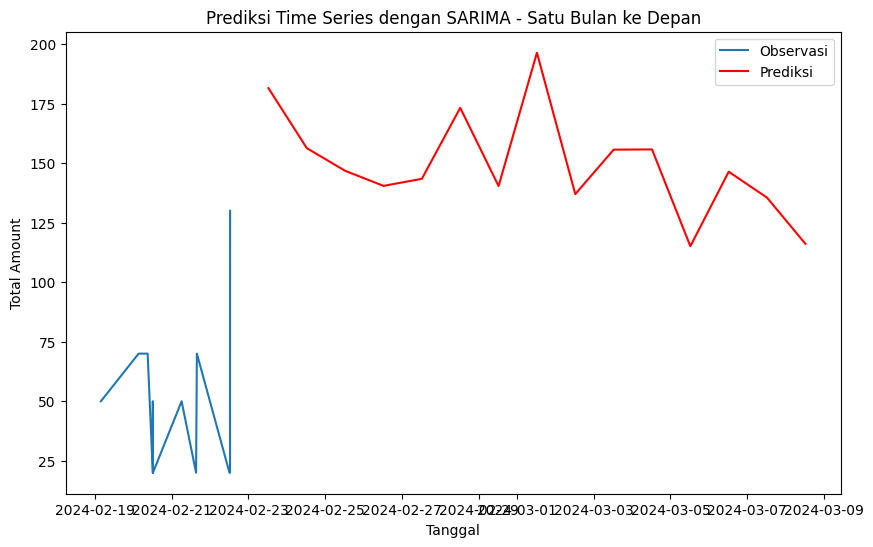

In [13]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts.values, label='Observasi')
plt.plot(forecast_values.index, forecast_values.values, color='red', label='Prediksi')
plt.title('Prediksi Time Series dengan SARIMA - Satu Bulan ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Total Amount')
plt.legend()

In [14]:
plt.show()
